<a href="https://colab.research.google.com/github/Michael5577/PhotoCraft/blob/full-code/PhotoCraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload an image file.


Saving codpdownload.png to codpdownload.png


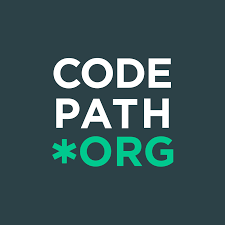

Dropdown(description='Choose effect:', options=('Blur', 'Sharpen', 'Grayscale', 'Resize', 'Rotate'), value='Bl…

Button(description='Apply Effect', style=ButtonStyle())

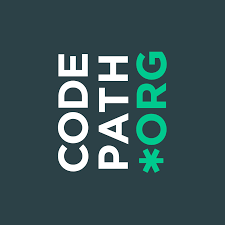

Button(description='Save Image', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import io
from PIL import Image, ImageFilter
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

def upload_and_display_image():
    clear_output()
    print("Please upload an image file.")
    uploaded = files.upload()
    if uploaded:
        image_name = list(uploaded.keys())[0]
        image = Image.open(io.BytesIO(uploaded[image_name]))
        display(image)
        return image
    else:
        print("No image uploaded.")
        return None

def apply_effect(effect, image):
    if image is None:
        print("Please upload an image first.")
        return

    if effect == "Blur":
        modified_image = image.filter(ImageFilter.BLUR)
    elif effect == "Sharpen":
        modified_image = image.filter(ImageFilter.SHARPEN)
    elif effect == "Grayscale":
        modified_image = image.convert("L")
    elif effect == "Resize":
        modified_image = image.resize((int(image.width/2), int(image.height/2)))
    elif effect == "Rotate":
        modified_image = image.rotate(90)
    else:
        print("Invalid effect selected.")
        return

    display(modified_image)
    save_option = widgets.Button(description="Save Image")
    display(save_option)

    def save_image(b):
        # Save the image to a temporary file first
        temp_filename = f"modified_{effect.lower()}_image.png"
        modified_image.save(temp_filename, format='PNG')

        # Now download the temporary file
        files.download(temp_filename)

    save_option.on_click(save_image)

def main():
    image = upload_and_display_image()

    if image:
        effect_dropdown = widgets.Dropdown(
            options=['Blur', 'Sharpen', 'Grayscale', 'Resize', 'Rotate'],
            value='Blur',
            description='Choose effect:',
        )

        apply_button = widgets.Button(description="Apply Effect")

        def on_apply_button_clicked(b):
            apply_effect(effect_dropdown.value, image)

        apply_button.on_click(on_apply_button_clicked)

        display(effect_dropdown, apply_button)

if __name__ == "__main__":
    main()